Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
import os
os.chdir('/content/drive/MyDrive/Sanford URSP688Y spring 24/Exercises/exercise06_sanford')

In [32]:
# Import packages and modules
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

import exercise06

# Request current data from the API

In [10]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
current_data = response.json()

# Inspect the contents
current_data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [11]:
# Make a dataframe out of data for available bikes
c_df = pd.DataFrame(current_data['data']['bikes'])

c_df.head()

,name,fusion_lat,is_reserved,bike_id,lon,is_disabled,fusion_lon,rental_uris,type,lat
0,222-581,0.0,0,540fb6f13d8999c83a3d7f797e0977b0,-77.024948,0,0.0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,electric_bike,38.906467
1,201-455,0.0,0,da9454f6255b1a5addd8ab48952a91eb,-77.147686,0,0.0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,electric_bike,38.864017
2,772-940,0.0,0,d410fee0d7a32b8993fd07ff172a0f1c,-76.900110,0,0.0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,electric_bike,39.006424
3,623-376,0.0,0,698fcf747adf49096db6cd261571e90f,-77.010497,0,0.0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,electric_bike,38.877655
4,362-649,0.0,0,1871a39d978e83f1da757463588ac81f,-77.058829,0,0.0,{'android': 'https://dc.lft.to/lastmile_qr_sca...,electric_bike,39.058255


# Load JSON data saved in a file

In [4]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-04_01-43-46.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    first_data = json.load(json_data)
    json_data.close()

In [5]:
# convert to a dataframe
first_df = pd.DataFrame(first_data['data']['bikes'])

# drop a column that we won't use, just to keep things clean
first_df = first_df.drop(columns=['rental_uris'])

first_df

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887423,electric_bike,0,228fcead5bda270ea7ebf04674ef7389,320-065,-77.025762
1,0,0.0,0.0,38.955381,electric_bike,0,cfada148cfa6fa2ab7903b153d11474d,570-760,-76.940119
2,0,0.0,0.0,38.881478,electric_bike,0,f276923ad259d0e29a4a64ad999c6bab,268-224,-77.027410
3,0,0.0,0.0,38.907799,electric_bike,0,76f98f8f819c41c4f60ec93ef8b2633b,137-726,-77.071632
4,0,0.0,0.0,38.898354,electric_bike,0,8e1856bacedc8da0bf14a3213ee65aa3,329-768,-77.046884
...,...,...,...,...,...,...,...,...,...
931,0,0.0,0.0,38.897205,electric_bike,0,e9d28efe33f241e43cfbf71e7f424a32,842-7452,-77.032506
932,0,0.0,0.0,39.027390,electric_bike,0,84345aed601aba94609a5ab9839f9d03,767-5523,-77.044267
933,0,0.0,0.0,38.917322,electric_bike,0,e5f921b8dfc0aabbfde13425d04befe4,224-5066,-76.981340
934,0,0.0,0.0,38.996119,electric_bike,0,a136f6edbb40449fe295640a4859d32c,420-8187,-77.077978


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [4]:
# This was just me messing around with the data -- no need to run this ce

df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')
# Remove and/or rearrange columns + put table entries in chronological order:
    # NOTE: I also took out 'is_reserved' and 'is_disabled' after checking that none of the listed bikes were reserved or disabled.
df = df[['bike_id', 'name', 'lon', 'lat', 'timestamp']].sort_values('timestamp')

def single_bike(id):
    df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')
    df = df[['bike_id', 'name', 'lon', 'lat', 'timestamp']].sort_values('timestamp')
    df = df.loc[df['name'] == id]
    return df

single_bike('320-065')

,bike_id,name,lon,lat,timestamp
0,d94788433d337e4186fb431076b52e91,320-065,-77.025747,38.887458,2024-03-03 15:11:08-05:00
0,d94788433d337e4186fb431076b52e91,320-065,-77.025756,38.887453,2024-03-03 15:16:08-05:00
0,d94788433d337e4186fb431076b52e91,320-065,-77.025755,38.887439,2024-03-03 15:21:08-05:00
0,d94788433d337e4186fb431076b52e91,320-065,-77.025773,38.887477,2024-03-03 15:26:08-05:00
0,8adf5a04fd2cdfbdbb4791e27c1092b9,320-065,-77.025755,38.887428,2024-03-03 15:31:08-05:00
...,...,...,...,...,...
0,b152b4d9bfd452ed16b9bc0b8e7dc766,320-065,-77.025779,38.887459,2024-03-04 17:27:43-05:00
0,e0c2d158f6f0afb7e3357f3e6a5d530c,320-065,-77.025761,38.887480,2024-03-04 17:32:43-05:00
0,e0c2d158f6f0afb7e3357f3e6a5d530c,320-065,-77.025795,38.887462,2024-03-04 17:37:43-05:00
0,5ccb20901f6e17e18ee135e91ebe8f9d,320-065,-77.025771,38.887506,2024-03-04 17:42:43-05:00


This is where you take over. Can you use this dataframe to answer the question(s) above?

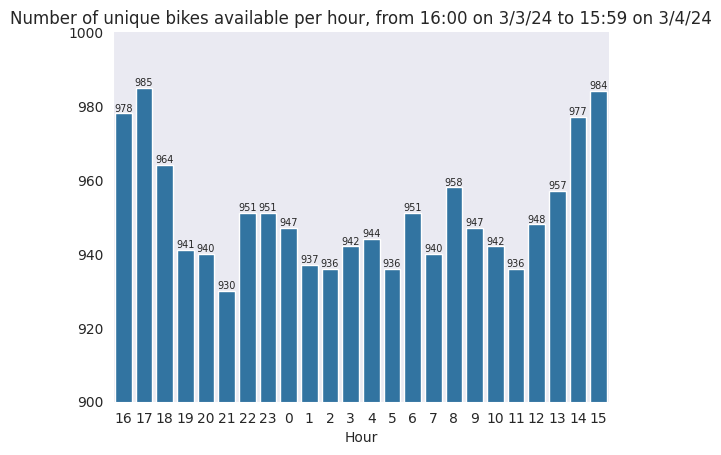

In [88]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

# First, import the module, which is where the functions are housed.
    # I commented out the autoreload because the text before the chart was annoying me, but feel free to undo if need be.
import exercise06_module_sanford
# %load_ext autoreload
# %autoreload 2

# Then call the function to create a chart:
exercise06_module_sanford.plot_bikes(df)

# NOTES:
    # This doesn't strictly answer the question -- instead, it tells you how many UNIQUE bikes were available every hour.
    # It's very possible that a bike was used and returned multiple times within a single hour, which may technically qualify as another available bike --
    # But I was tired of looking at this dataset, so I just decided that this is good enough.